# Electric Machinery Fundamentals 5th edition
## Chapter 3

## Animation: Three-phase currents 
(based on [Example 3-1](Ch3-Example_3-01.ipynb))

**Calculate the combined currents of a three-phase stator (adapted for 50Hz).**

Import the PyLab namespace (provides set of useful commands and constants like $\pi$):

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Set up the basic conditions:

In [2]:
imax = 1                    # Normalize imax to 1
freq = 50                   # [Hz]
w = 2*pi*freq               # [rad/s] angluar velocity
t = linspace(0, 1./50, 100) # 100 values for one period
wt = w*t                    # we are going to use this quite often

First, generate the three component magnetic fields

In [3]:
# amplitudes (change them to see effect of non-symmetry):
I_amp = [[1.0], [1.0], [1.0]]
# time variants
I_time = array([sin(wt),
                sin(wt-2*pi/3),
                sin(wt+2*pi/3)])
# vectorial shifts
I_shift = [[cos(0) + 1j*sin(0)],
           [cos(2*pi/3) + 1j*sin(2*pi/3)], 
           [cos(-2*pi/3) + 1j*sin(-2*pi/3)]]
# all combined
I_ph = I_amp * I_time
I = I_ph * I_shift

Calculate the combined current vector:

In [4]:
Itot = I[0] + I[1] + I[2]

Calculate neutral current $I_n$:

In [5]:
# Its amplitude 
In_amp = (I_ph[0] + I_ph[1] + I_ph[2])
# Its angle:
In_ang = angle(Itot)
In = In_amp * exp(1j*In_ang)   # combine to a complex In 

Calculate a circle representing the expected maximum value of `Itot`:

In [6]:
circle = 1.5 * (cos(wt) + 1j*sin(wt))

**Generating  the animation:**

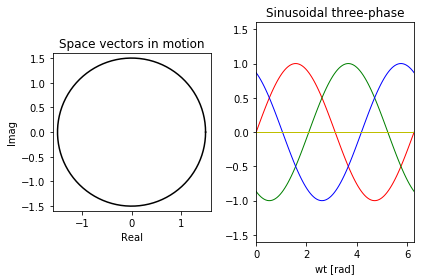

In [7]:
# First set up the figure, the axis, and the plot element we want to animate
from matplotlib import animation
fig = figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.set_title('Space vectors in motion')
ax1.set_xlabel('Real')
ax1.set_ylabel('Imag')
ax1.set_xlim(-1.6, 1.6)
ax1.set_ylim(-1.6, 1.6)
ax1.set_aspect('equal')
ax2.set_title('Sinusoidal three-phase')
ax2.set_xlabel('wt [rad]')
ax2.set_xlim(0, 2*pi)
ax2.set_ylim(-1.6, 1.6)
# set up the different line colours
la, lb, lc, ltot, ctot, ln, cn = ax1.plot([], [], 'red', 
                                [], [], 'green', 
                                [], [], 'blue', 
                                [], [], 'magenta', 
                                [], [], 'magenta', 
                                [], [], 'y', 
                                [], [], 'y', 
                                lw=2)


# set up the moving dots
da, db, dc, dn = ax2.plot([], [], 'ro',   
                          [], [], 'go',
                          [], [], 'bo', 
                          [], [], 'yo', 
                          lw=2)

tight_layout()  # sometimes useful when sub-plots get a bit crowded

# initialization function: plot the background of each frame
def init():
    ax1.plot(real(circle), imag(circle), 'black');
    ax2.plot(wt, I_ph[0,], 'red',
             wt, I_ph[1,], 'green',
             wt, I_ph[2,], 'blue',
             wt, In_amp, 'y',
             lw=1);
    return


# animation function.  This is called sequentially
def animate(simData):
    i = simData - 1 # python index starts at 0 
    re = [asscalar(real(I[0,i])), asscalar(real(I[1,i])), asscalar(real(I[2,i]))]
    im = [asscalar(imag(I[0,i])), asscalar(imag(I[1,i])), asscalar(imag(I[2,i]))]
    ren = real(In[i])
    imn = imag(In[i])
    la.set_data([0, re[0]], 
                [0, im[0]])
    lb.set_data([0, re[1]], 
                [0, im[1]])
    lc.set_data([0, re[2]],
                [0, im[2]])
    ltot.set_data([0, real(Itot[i])], [0, imag(Itot[i])])
    ctot.set_data(real(Itot[:i+1]),imag(Itot[:i+1]))
    ln.set_data([0, real(In[i])], [0, imag(In[i])])
    cn.set_data(real(In[:i]), imag(In[:i]))
    da.set_data(wt[i], I_ph[0,i])
    db.set_data(wt[i], I_ph[1,i])
    dc.set_data(wt[i], I_ph[2,i])
    dn.set_data(wt[i], In_amp[i])
    return la, lb, lc, ltot, da, db, dc
    

# call the animator:  
anim = animation.FuncAnimation(fig, animate, init_func=init, 
                                interval=50)   

If run "normally" (and not in "inline" mode like we are doing here) the command above would have opened a window with the animation running.
On the server we can only run "inline" mode but there is a solution to simply generate the animation as a video and embed it right here:

In [8]:
from IPython.display import HTML
HTML(anim.to_html5_video())